## Exploring the Dynamics of Real Estate Market King County, in the United States: A Data Science Perspective

Business Overview
The `US` real estate market has seen fluctuations over time, generally trending upwards with occasional declines. This trend is driven by various factors, including supply and demand dynamics, economic conditions, interest rates, demographics, and location-specific elements

`Supply and demand` play a pivotal role in shaping house prices. Limited housing inventory compared to demand tends to drive prices higher, while an oversupply can lead to price decreases

**Economic factors**, such as employment levels, GDP growth, and inflation, influence both supply and demand. Favorable economic conditions stimulate demand, pushing prices up, while economic downturns can dampen demand, leading to stabilization or decline in prices.

**Interest rates** impact affordability, with lower rates boosting demand and prices, while higher rates may reduce demand and stabilize or lower prices.

**Demographic shifts**, like changes in household formation and migration patterns, affect housing preferences and demand. Location-specific factors, including proximity to employment, quality of schools, and neighborhood amenities, also influence prices.

Understanding these factors is crucial for navigating the real estate market effectively, whether buying, selling, investing, or developing properties.

# 1. Introduction

This data science project delves into the intricacies of the real estate market in King County, USA, aiming to uncover insights into its dynamics and trends leading up to the 2008 recession. By harnessing data-driven methodologies, we seek to shed light on the factors influencing housing prices, market fluctuations, and risk exposure within this region. Through comprehensive analysis, we aim to provide stakeholders with valuable insights to inform decision-making and mitigate potential risks.

**1.1.Market Trajectory:**

King County, located in the state of Washington, experienced significant growth and development in its real estate market prior to the 2008 recession. Home prices surged, driven by factors such as population growth, economic expansion, and favorable lending conditions. However, beneath this apparent prosperity lay underlying vulnerabilities that would ultimately contribute to the downturn.

**1.2.Factors Influencing the Boom:**

1.Housing Market Dynamics: Analysis of key housing market indicators, including median home prices, inventory levels, and sales volume, will be conducted to assess market trends and dynamics. Exploring spatial variations within King County will provide insights into localized market conditions and demand-supply dynamics.

**2.Mortgage Market Dynamics:** The role of mortgage lending practices and financial instruments in fueling the housing boom will be examined. This includes analyzing the prevalence of subprime mortgages, adjustable-rate mortgages (ARMs), and other mortgage products that proliferated during this period.

**3.Socioeconomic Factors:** Socioeconomic indicators, such as population growth, employment rates, and income levels, will be analyzed to understand their impact on housing demand and affordability. Demographic shifts and migration patterns within King County will also be explored to identify demand drivers.

**4.Financial Risk Exposure:** The exposure of financial institutions operating within King County to mortgage-backed securities (MBS), collateralized debt obligations (CDOs), and other complex financial instruments will be assessed. This includes quantifying the extent of risk exposure and assessing the implications for market stability.

## 2. Market Penetration Strategy

**2.1. Strategic Objectives**

Our entry into the King County market is driven by strategic objectives aimed at solidifying our presence and capturing market share:

Establishing a Strong Presence: King County offers immense potential for growth, with its vibrant economy and diverse housing market. By establishing a strong presence in this market, we aim to enhance our brand reputation and credibility among local residents and stakeholders.

Capitalizing on Market Opportunities: Over the years, King County has experienced fluctuations in its real estate market, including the impact of significant events such as the 2008 recession. Despite challenges, the county has consistently demonstrated resilience and recovery, presenting opportunities for strategic investments and expansion.

Meeting Local Market Needs: Each market has its unique dynamics and demands. By understanding the specific needs and preferences of King County residents, we can tailor our services to offer unparalleled value and address the evolving demands of the local market.

## 3. Project Alignment
**3.1. Project Scope**

Our project aims to equip Seattle Real Estate with the necessary insights and strategies to facilitate a successful entry into the King County real estate market. By leveraging data-driven analysis and market intelligence, we will provide actionable recommendations to navigate the complexities of the local market landscape effectively.

**3.2. Problem Statement:**

Despite its potential for growth and profitability, entering the King County real estate market presents Seattle Real Estate with significant challenges stemming from the market's dynamic nature and diverse factors influencing supply, demand, and pricing. To ensure a successful market penetration strategy, Seattle Real Estate requires a comprehensive understanding of local market dynamics, including the impact of economic conditions, demographic shifts, and location-specific elements on housing preferences and demand. Additionally, the company needs actionable insights and strategies derived from data-driven analysis to effectively identify lucrative market segments, optimize pricing strategies, and enhance client acquisition and retention efforts. Therefore, the overarching problem statement is to equip Seattle Real Estate with the necessary tools, insights, and strategies to navigate the complexities of the King County real estate market and establish a strong presence while capturing market share effectively.

**3.2. Objectives**

Through our data analytics and market insights, we offer Seattle Real Estate a strategic advantage by:

1.`Identifying Lucrative Market Segments`: By analyzing market trends and customer preferences, we can pinpoint lucrative market segments and target demographics for tailored marketing initiatives, maximizing our reach and impact.

2.`Optimizing Pricing Strategies`: Understanding property valuation trends and competitive benchmarks allows us to optimize pricing strategies, ensuring that our offerings remain competitive and attractive to potential buyers.

3.`Enhancing Client Acquisition and Retention`: Personalized services and proactive engagement are key to building long-term relationships with clients and stakeholders. By leveraging data-driven insights, we can enhance client acquisition and retention, fostering sustainable growth and success in the King County market.

## Business Understanding
**Background Information:**

The King County House Sales dataset contains information about house sales in King County. We are working on behalf of a real estate agency, aiming to provide homeowners with advice on how home renovations might increase the estimated value of their properties.

The dataset includes various features such as the number of bedrooms, bathrooms, square footage, etc. Our goal is to identify key features that impact home values and provide data-driven recommendations to homeowners.

By analyzing relevant features of sold houses, we can identify key factors affecting sale prices and provide actionable recommendations.

**Challenges:**

Seattle Real Estate faces several challenges in expanding into the King County market, including:

.Identifying significant features impacting home values.

.Quantifying the effect of renovations on home prices.

.Balancing renovation costs with the expected increase in home value.
Proposed Solution

These challenges require a deep understanding of local market dynamics and the ability to leverage data effectively to make informed decisions. Proposed Solution:

We propose using regression modeling techniques to analyze the dataset. By building predictive models, we can estimate the impact of different renovations on home prices. This will enable us to provide homeowners with actionable advice on maximizing the value of their properties.

**Brief Conclusion:**

Through our comprehensive analysis and strategic recommendations, we aim to empower Seattle Real Estate to make informed decisions and successfully enter the King County real estate market. Our data-driven approach will help them achieve sustainable growth and enance their penetration of King county rela estate market..

## Data Understanding
**1. Dataset Description:**

The data utilized for this project consists of two primary datasets:

`data/kc_house_data.csv`: This dataset contains detailed information about individual properties in King County, including attributes such as square footage, number of bedrooms and bathrooms, location, and sale price.

Here are the key columns in the datasets:

`id`: Unique identifier for each house sale.

`date`: Date of the house sale.

`price`: Sale price of the house.

`bedrooms`: Number of bedrooms in the house.

`bathrooms`: Number of bathrooms in the house.

`sqft_living`: Square footage of the living area.

`sqft_lot`: Square footage of the lot.

`floors`: Number of floors in the house.

`waterfront`: Whether the house has a waterfront view (0 for no, 1 for yes).

`condition`: Overall condition of the house.

`grade`: Overall grade given to the housing unit, based on King County grading system.

`sqft_above`: Square footage of the house above ground level.

`sqft_basement`: Square footage of the basement.

`yr_built`: Year the house was built.

`yr_renovated`: Year the house was renovated.

`zipcode`: Zip code of the house location.

`lat`: Latitude coordinate of the house.

`long`: Longitude coordinate of the house.

`sqft_living15`: Average square footage of interior housing living space for the nearest 15 neighbors.

`sqft_lot15`: Average square footage of the land lots of the nearest 15 neighbors.

**Relevance of king County dataset from stakeholder**

The columns in the dataset provide crucial information about various aspects of the houses that could potentially influence their sale prices. Features such as number of bedrooms, bathrooms, square footage, condition, and grade are likely to have a significant impact on home values. We'll use these features to build regression models and identify which renovations or characteristics contribute most to home prices.

## 1.3 DATA PREPARATION

The approach taken shall involve the following steps:

1. Data Mining
2. Data Cleaning
3. Data Analysis 

### 1.3.1 DATA MINING
We shall import the necessary libraries for the whole data analysis approach we shall be taking as well as reading into the various documents that we shall be using. We shall display the first 5 results of each to get a better understanding of what is in each documents and give a summary of what we are observing

In [207]:
# libraries required for the data anaylsis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import warnings
%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
import plotly.express as px
from scipy.stats import skew, kurtosis
import folium
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
import plotly.graph_objs as go
import plotly.express as px

### 1.3.1.1 Overview of kc_house_data dataset

In [208]:
# reading the data into the king_county_df
king_county_df=pd.read_csv("data/kc_house_data.csv")
king_county_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [209]:
#Looking at the info printout
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [210]:
#conversion of date to dtype datetime to confirm timeframe of dataset
date_df=pd.to_datetime(king_county_df["date"])
date_df

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [211]:
# Timestamp of the dataframe
date_df.min(),date_df.max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

Cursory Observation:
1. The dataframe has 21,597 entries with waterfront, view and yr_renovated having null entries
2. Datatypes range from int64, float64 and objects and will require further analysis
3. 21 columns in the dataset, further analysis to determine if all shall be used 

### 1.3.2. DATA CLEANING
Data cleaning shall involve the following steps:
1. Check and resolve for duplicate values
2. Check and resolve for null values
3. check and resolve for extraneous values
4. Perform further cleaning as needed

In [212]:
#FUNCTIONS TO BE USED DURING DATA CLEANING

#Function to get the number of duplictes
def get_duplicates(df):
    df=df[df.duplicated(keep=False)]
    return df

# Function to drop duplicate data in a dataframe
def drop_data(df):
    df.drop_duplicates(subset=None, keep="first", inplace= True)
    return df

# Function to get extraneous values i.e. values that look like placeholders or are exaggerated values
def extraneous_values(df):
    for col in df.columns:
        print(col, '\n', df[col].value_counts(normalize=True), '\n')

# Function to calculate percentage of missing data in a column
def missing_data(df, column):
    length_of_df=len(df)                                                    #getting the length of the dataframe
    missing_data= column.isna().sum()                                       #total number of missing data in column foreign_gross
    percentage_of_missing_data = round((missing_data/length_of_df*100),2)   #percentage of missing data in the foreign_gross column
    return print(f"Percentage of Missing Data: {percentage_of_missing_data}""%")


### 1.3.2.1 Check and resolve for duplicate values in King_county_df

In [213]:
#checking for duplicates in king_county_df
get_duplicates(king_county_df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [214]:
#checking unique identifiers for houses
king_county_df["id"].value_counts()

id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64

In [215]:
# exploration of ID unique identifier 795000620
king_county_df[king_county_df["id"]==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,NO,NONE,...,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,NO,NONE,...,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,NONE,...,5 Fair,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


In [216]:
# difference in unique house identifiers and total entries
multiple_times_sold=len(king_county_df["id"])-len(king_county_df["id"].value_counts())
print(f"No of houses sold more than once in a year: ", multiple_times_sold )

No of houses sold more than once in a year:  177


Cursory Observations
The length of the unique identifier ID is 21,420 which is less than the 21,597 entries seen from the info printout. This would indicate duplicates of the unique identifier but we can see that each entry is unique to the database.
We can conclude that there are 177 houses that have been sold more than once between May 2014 and May 2015. We can hence conclude that there are no duplicates

### 1.3.2.2 Check and resolve for null values in king_county_df

In [217]:
#checking for null values in the king_county dataset
king_county_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [218]:
# Checking the counts for each value in the column waterfront
king_county_df["waterfront"].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [219]:
# percentage of missing data
missing_data(king_county_df, king_county_df["waterfront"])

# Replacing Nan Values in Waterfront column
king_county_df["waterfront"].fillna("NO", inplace=True)
king_county_df["waterfront"].value_counts()

Percentage of Missing Data: 11.0%


waterfront
NO     21451
YES      146
Name: count, dtype: int64

Observation: 
The Null values account for 11% of the dataset. While dropping these rows would be possible, we would lose quite a bit of data for this dataset and this may affect or skew the results. As the most common value is NO we assume that the NaN values are also NO and replace with it.

In [220]:
# Checking the counts for each value in the column yr_renovated
king_county_df["yr_renovated"].value_counts()

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

In [221]:
# percentage of missing data
missing_data(king_county_df,king_county_df["yr_renovated"])

# Replacing NaN values in yr_renovated column
king_county_df['yr_renovated'].fillna(0, inplace=True)
king_county_df["yr_renovated"].value_counts()

Percentage of Missing Data: 17.79%


yr_renovated
0.0       20853
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

Observation: 
Similar to the Waterfront column, dropping the missing data would greatly affect the dataset and hence we shall replace the Nan values with 0.0 which is the most common value in the column

In [222]:
# Checking the counts for each value in the column view
king_county_df["view"].value_counts(normalize=True)

view
NONE         0.901923
AVERAGE      0.044441
GOOD         0.023591
FAIR         0.015325
EXCELLENT    0.014721
Name: proportion, dtype: float64

In [223]:
# percentage of missing data
missing_data(king_county_df, king_county_df["view"])

# Dropping NaN values in view column
king_county_df.dropna(subset=["view"], inplace=True)
king_county_df["view"].value_counts(normalize=True)

Percentage of Missing Data: 0.29%


view
NONE         0.901923
AVERAGE      0.044441
GOOD         0.023591
FAIR         0.015325
EXCELLENT    0.014721
Name: proportion, dtype: float64

Observation:
The percentage of missing date is less than 1% of the dataset. We can drop these rows without causing much effect to the overall dataset. 

In [224]:
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   21534 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long       

In [225]:
king_county_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Observation:
1. The null values that were present in the dataset have now been resolved either by dropping the rows or replacing them.
2. The dataframe now contains 21,534 entries with no null values present.

### 1.3.2.3 Check and resolve for extraneous values in king_county_df

In [226]:
# Checking for extraneous values in all columns
extraneous_values(king_county_df)

id 
 id
795000620     0.000139
2473380920    0.000093
6117501820    0.000093
722039087     0.000093
9136103130    0.000093
                ...   
1211000185    0.000046
6448000020    0.000046
2592400470    0.000046
5249802660    0.000046
1523300157    0.000046
Name: proportion, Length: 21357, dtype: float64 

date 
 date
6/23/2014    0.006594
6/26/2014    0.006083
6/25/2014    0.006083
7/8/2014     0.005898
4/27/2015    0.005758
               ...   
1/31/2015    0.000046
5/24/2015    0.000046
5/15/2015    0.000046
8/3/2014     0.000046
7/27/2014    0.000046
Name: proportion, Length: 371, dtype: float64 

price 
 price
350000.0    0.007941
450000.0    0.007941
550000.0    0.007384
500000.0    0.007059
425000.0    0.006966
              ...   
406550.0    0.000046
278800.0    0.000046
439888.0    0.000046
354901.0    0.000046
402101.0    0.000046
Name: proportion, Length: 3613, dtype: float64 

bedrooms 
 bedrooms
3     0.454676
4     0.318798
2     0.127891
5     0.074115
6     0.01253

Observation:
 * There is a placeholder in the sqft_basement column i.e ? which needs to be replaced
 * There also seems to be an extraneous value in the bedrooms columns i.e. 33 bedrooms
 * All other columns do not seem to have any extraneous values

In [227]:
# Checking the counts for each value in the column sqft_basement
king_county_df["sqft_basement"].value_counts()

sqft_basement
0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
3480.0        1
1840.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 302, dtype: int64

In [228]:
# Checking column datatype
print(f"datatype for column:", king_county_df["sqft_basement"].dtype)

# creating a variable to hold the dataframe with sqft basement with a datatype of float
king_county_df['sqft_basement'] = pd.to_numeric(king_county_df['sqft_basement'], errors="coerce")

datatype for column: object


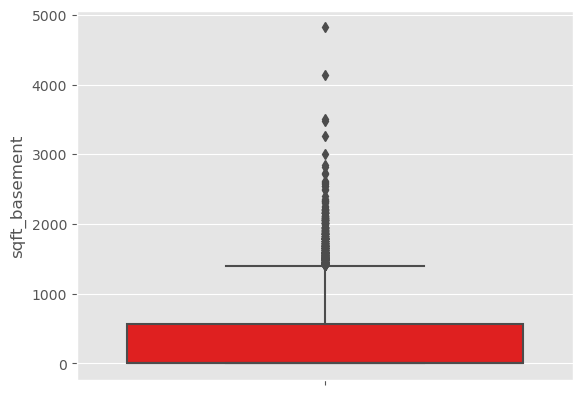

In [229]:
#Quick plot to check for outliers in the data set
sns.boxplot(y=king_county_df['sqft_basement'],color="r");

In [230]:
# Median value is selected as it is not affected by the outliers
median_value=king_county_df['sqft_basement'].median()
print(median_value)

# replacing placeholder value with median_value derived above
king_county_df["sqft_basement"].replace(np.nan,median_value, inplace=True)
king_county_df["sqft_basement"].unique()

0.0


array([   0.,  400.,  910., 1530.,  730., 1700.,  300.,  970.,  760.,
        720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,  588.,
       1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,  500.,
       1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,  840.,
        380.,  770.,  480.,  570., 1490.,  620., 1250., 1270.,  120.,
        650.,  180., 1130.,  450., 1640., 1460., 1020., 1030.,  750.,
        640., 1070.,  490., 1310.,  630., 2000.,  390.,  430.,  210.,
       1430., 1950.,  440.,  220., 1160.,  860.,  580., 2060., 1820.,
       1180.,  200., 1150., 1200.,  680.,  530., 1450., 1170., 1080.,
        960.,  280.,  870., 1100.,  460., 1400.,  660., 1220.,  900.,
        420., 1580., 1380.,  475.,  690.,  270.,  350.,  935.,  710.,
       1370.,  980.,  850., 1470.,  160.,  950.,   50.,  740., 1780.,
       1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,  890.,
       1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800., 1120.,
       1810.,   60.,

In [231]:
king_county_df['sqft_basement'].value_counts()

sqft_basement
0.0       13250
600.0       216
500.0       209
700.0       207
800.0       201
          ...  
3480.0        1
1840.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 301, dtype: int64

In [232]:
# Checking the counts for each value in the column bedrooms
king_county_df["bedrooms"].value_counts()

bedrooms
3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [233]:
king_county_df[king_county_df["bedrooms"]==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [234]:
king_county_df[king_county_df["bedrooms"]==3][:5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113


Observation:
In the bedrooms column, from domain knowledge we know that it is not possible for a house to have 33 bedrooms in a living space of 1620 sqft. Compared to 3 bedroom houses, the former seems to be a typing error and we shall replace 33 bedrooms with 3 bedrooms

In [235]:
# replacing erroneous value with rationalized value
king_county_df["bedrooms"].replace(33,3, inplace=True)
king_county_df["bedrooms"].value_counts()

bedrooms
3     9792
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [236]:
king_county_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.371645,2.115712,2079.827854,1.509060e+04,1.494126,1788.557537,285.244311,1971.002275,68.866722,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.904144,0.768602,917.446520,4.138021e+04,0.539806,827.745641,439.334095,29.376044,364.314552,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Observation:
All extraneous and placeholder values have be catered for and we can see that all the values fall withing acceptable parameters which may include outliers


### 1.3.2.4  Perform further cleaning as needed in king_county_df

Further Feature engineering to know in which seasons a house was sold.

In [237]:
# applying mapping to determine which season relates to each month
season_mapping={
    "03": "Spring", "04": "Spring", "05": "Spring",
    "06": "Summer", "07": "Summer", "08": "Summer",
    "09": "Autumn", "10": "Autumn", "11": "Autumn",
    "12":"Winter", "01":"Winter", "02":"Winter"
}
king_county_df["seasons"] = date_df.apply(lambda x: x.strftime('%m')).map(season_mapping)
king_county_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'seasons'],
      dtype='object')

In [238]:
king_county_df["seasons"].value_counts()

seasons
Spring    6493
Summer    6320
Autumn    5042
Winter    3679
Name: count, dtype: int64

In [239]:
#dropping columns that do not provide actionable insight
to_drop = [
'id',
'sqft_living15',
'sqft_lot15',
]
king_county_df.drop(columns=to_drop, inplace=True)

In [240]:
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21534 non-null  object 
 1   price          21534 non-null  float64
 2   bedrooms       21534 non-null  int64  
 3   bathrooms      21534 non-null  float64
 4   sqft_living    21534 non-null  int64  
 5   sqft_lot       21534 non-null  int64  
 6   floors         21534 non-null  float64
 7   waterfront     21534 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21534 non-null  object 
 10  grade          21534 non-null  object 
 11  sqft_above     21534 non-null  int64  
 12  sqft_basement  21534 non-null  float64
 13  yr_built       21534 non-null  int64  
 14  yr_renovated   21534 non-null  float64
 15  zipcode        21534 non-null  int64  
 16  lat            21534 non-null  float64
 17  long           21534 non-null  float64
 18  seasons    

In [241]:
# Splitting the columns based on variable types
categorical_columns = []
numerical_columns = []
for i in king_county_df.columns:
    if king_county_df[i].dtype == 'O':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
        
print(f"Categorical columns:",  categorical_columns) 
print(f"Numerical columns:",  numerical_columns) 

Categorical columns: ['date', 'waterfront', 'view', 'condition', 'grade', 'seasons']
Numerical columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']


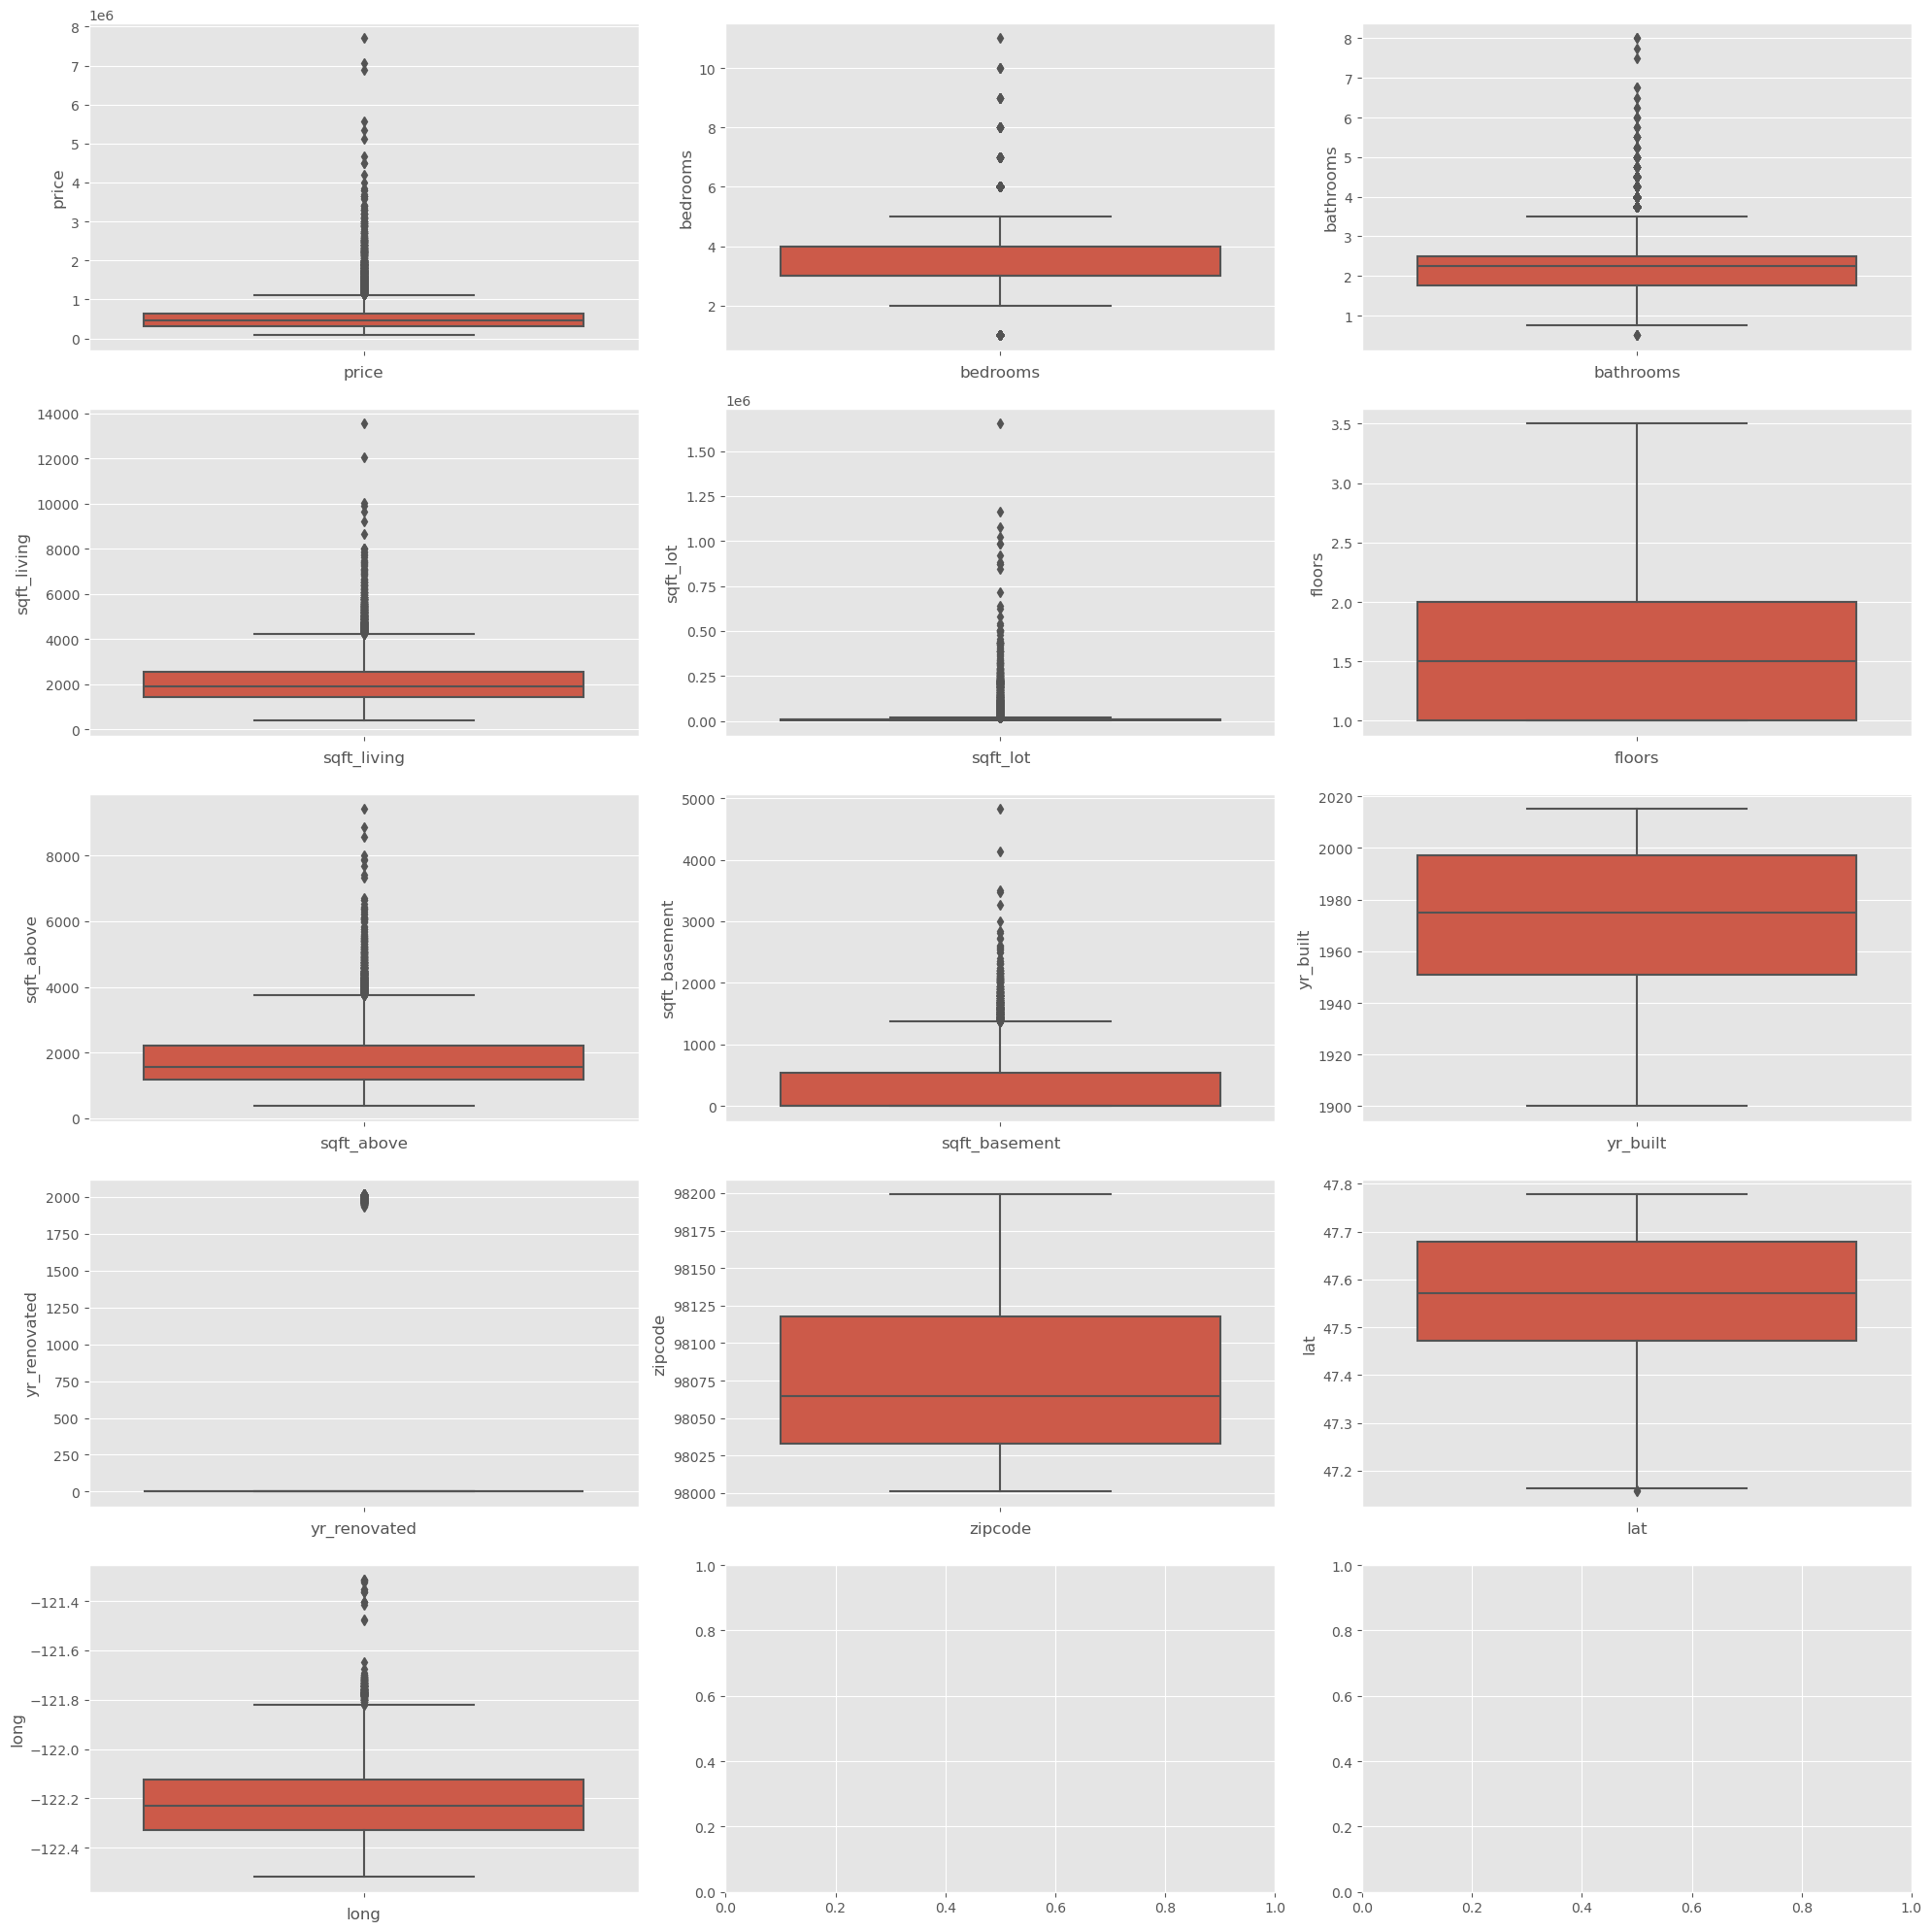

In [242]:
# Outlier Analysis for numeric variables
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))

# Iterate over the columns and create the box plots
for i, column in enumerate(numerical_columns):
#     print(i)
    sns.boxplot(y=king_county_df[column], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_xlabel(column)  

plt.tight_layout()

plt.show()

Observation:
   1. Multiple numeric variables have outliers but given that this is real data, we will avoid removing outliers as it will not give accurate insight into the dataset.
   2. Numeric variables such as zipcode, latitude and longitude seem not to have an outliers at all but from our domain knowledge we know that they are data related to the location of the data hence we can assertain that all the information is for King County City
   3. We also see that variable floor and year built have no outliers showing that houses built range between approximately the years 1950 and 2000 while the houses are do not go above 3.5 floors indicating no highrises/skyscrapers were sold in that calendar year

In [243]:
## Age of the House
# Calculating the age of the house by subtracting the year built from 2015.
current_year = 2015
king_county_df['house_age'] = current_year - king_county_df['yr_built']
king_county_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'seasons', 'house_age'],
      dtype='object')

In [244]:
## Renovated Status for renovated, 0 for not renovated).
# This feature captures the potential impact of renovations on house prices.
# Creating a binary feature indicating whether the house has been renovated (1 for renovated, 0 for not renovated)
king_county_df['renovated'] = (king_county_df['yr_renovated'] != 0).astype(int)

# Count the unique values in the 'renovated' column
renovated_counts = king_county_df['renovated'].value_counts()

# Display the counts
print("Counts of unique values in the 'renovated' column:")
print(renovated_counts)

Counts of unique values in the 'renovated' column:
renovated
0    20791
1      743
Name: count, dtype: int64


**EXPLORATORY DATA ANALYSIS**

**Univariate EDA**

We'll explore the distribution of individual variables.

In [245]:
king_county_df['price'].describe()

count    2.153400e+04
mean     5.400577e+05
std      3.660596e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [246]:

def plot_histogram_with_median_line(df, x_column):
    """
    Plot a histogram of a column in a DataFrame with a vertical line representing the median value.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column to plot as the x-axis.

    Returns:
        None
    """
    # Plot histogram
    fig = px.histogram(df, x=x_column, marginal="box", nbins=200, title="Distribution of " + x_column)
    fig.update_xaxes(title_text=x_column)
    fig.update_yaxes(title_text='Count')

    # Adding a vertical line to represent the median value
    median_value = df[x_column].median()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=median_value, x1=median_value, y0=0, y1=1, xref='x', yref='paper'
    )

    # Show the figure
    fig.show()


In [247]:
plot_histogram_with_median_line(king_county_df, "price")

*The curve has a sharp peak on the left side, indicating that a significant number of items fall within a lower price range.

*The positive skewness (longer tail on the right) implies that there are some outliers with much higher prices.


In [248]:

# Calculate skewness and kurtosis
skw = skew(king_county_df['price'])
kurt = kurtosis(king_county_df['price'])

# Print the results
print("Skewness:", skw)
print("Kurtosis:", kurt)

Skewness: 3.9741247585096726
Kurtosis: 33.85260123948197


in the case of right-skewed data like this, we might consider applying a transformation like the
logarithmic transformation to make the distribution more symmetric.

In [249]:


def plot_histogram_with_median_line(df, x_column):
    """
    Plot a histogram of a column in a DataFrame with a vertical line representing the median value.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column to plot as the x-axis.

    Returns:
        None
    """
    # Plot histogram
    fig = px.histogram(df, x=np.log(df[x_column]), marginal="box", nbins=200, title="Distribution of log(" + x_column + ")")
    fig.update_xaxes(title_text="log(" + x_column + ")")
    fig.update_yaxes(title_text='Count')

    # Adding a vertical line to represent the median value
    median_value = np.log(df[x_column]).median()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=median_value, x1=median_value, y0=0, y1=1, xref='x', yref='paper'
    )

    # Show the figure
    fig.show()


plot_histogram_with_median_line(king_county_df, "price")


**Relationship with the features**

Now, let’s delve deeper by employing scatter plots to visually assess the linear relationships between individual features and the target variable. This exploration will provide a more granular understanding of how each feature contributes to the predictive dynamics of the target variable.

**Relationship with  numerical features**

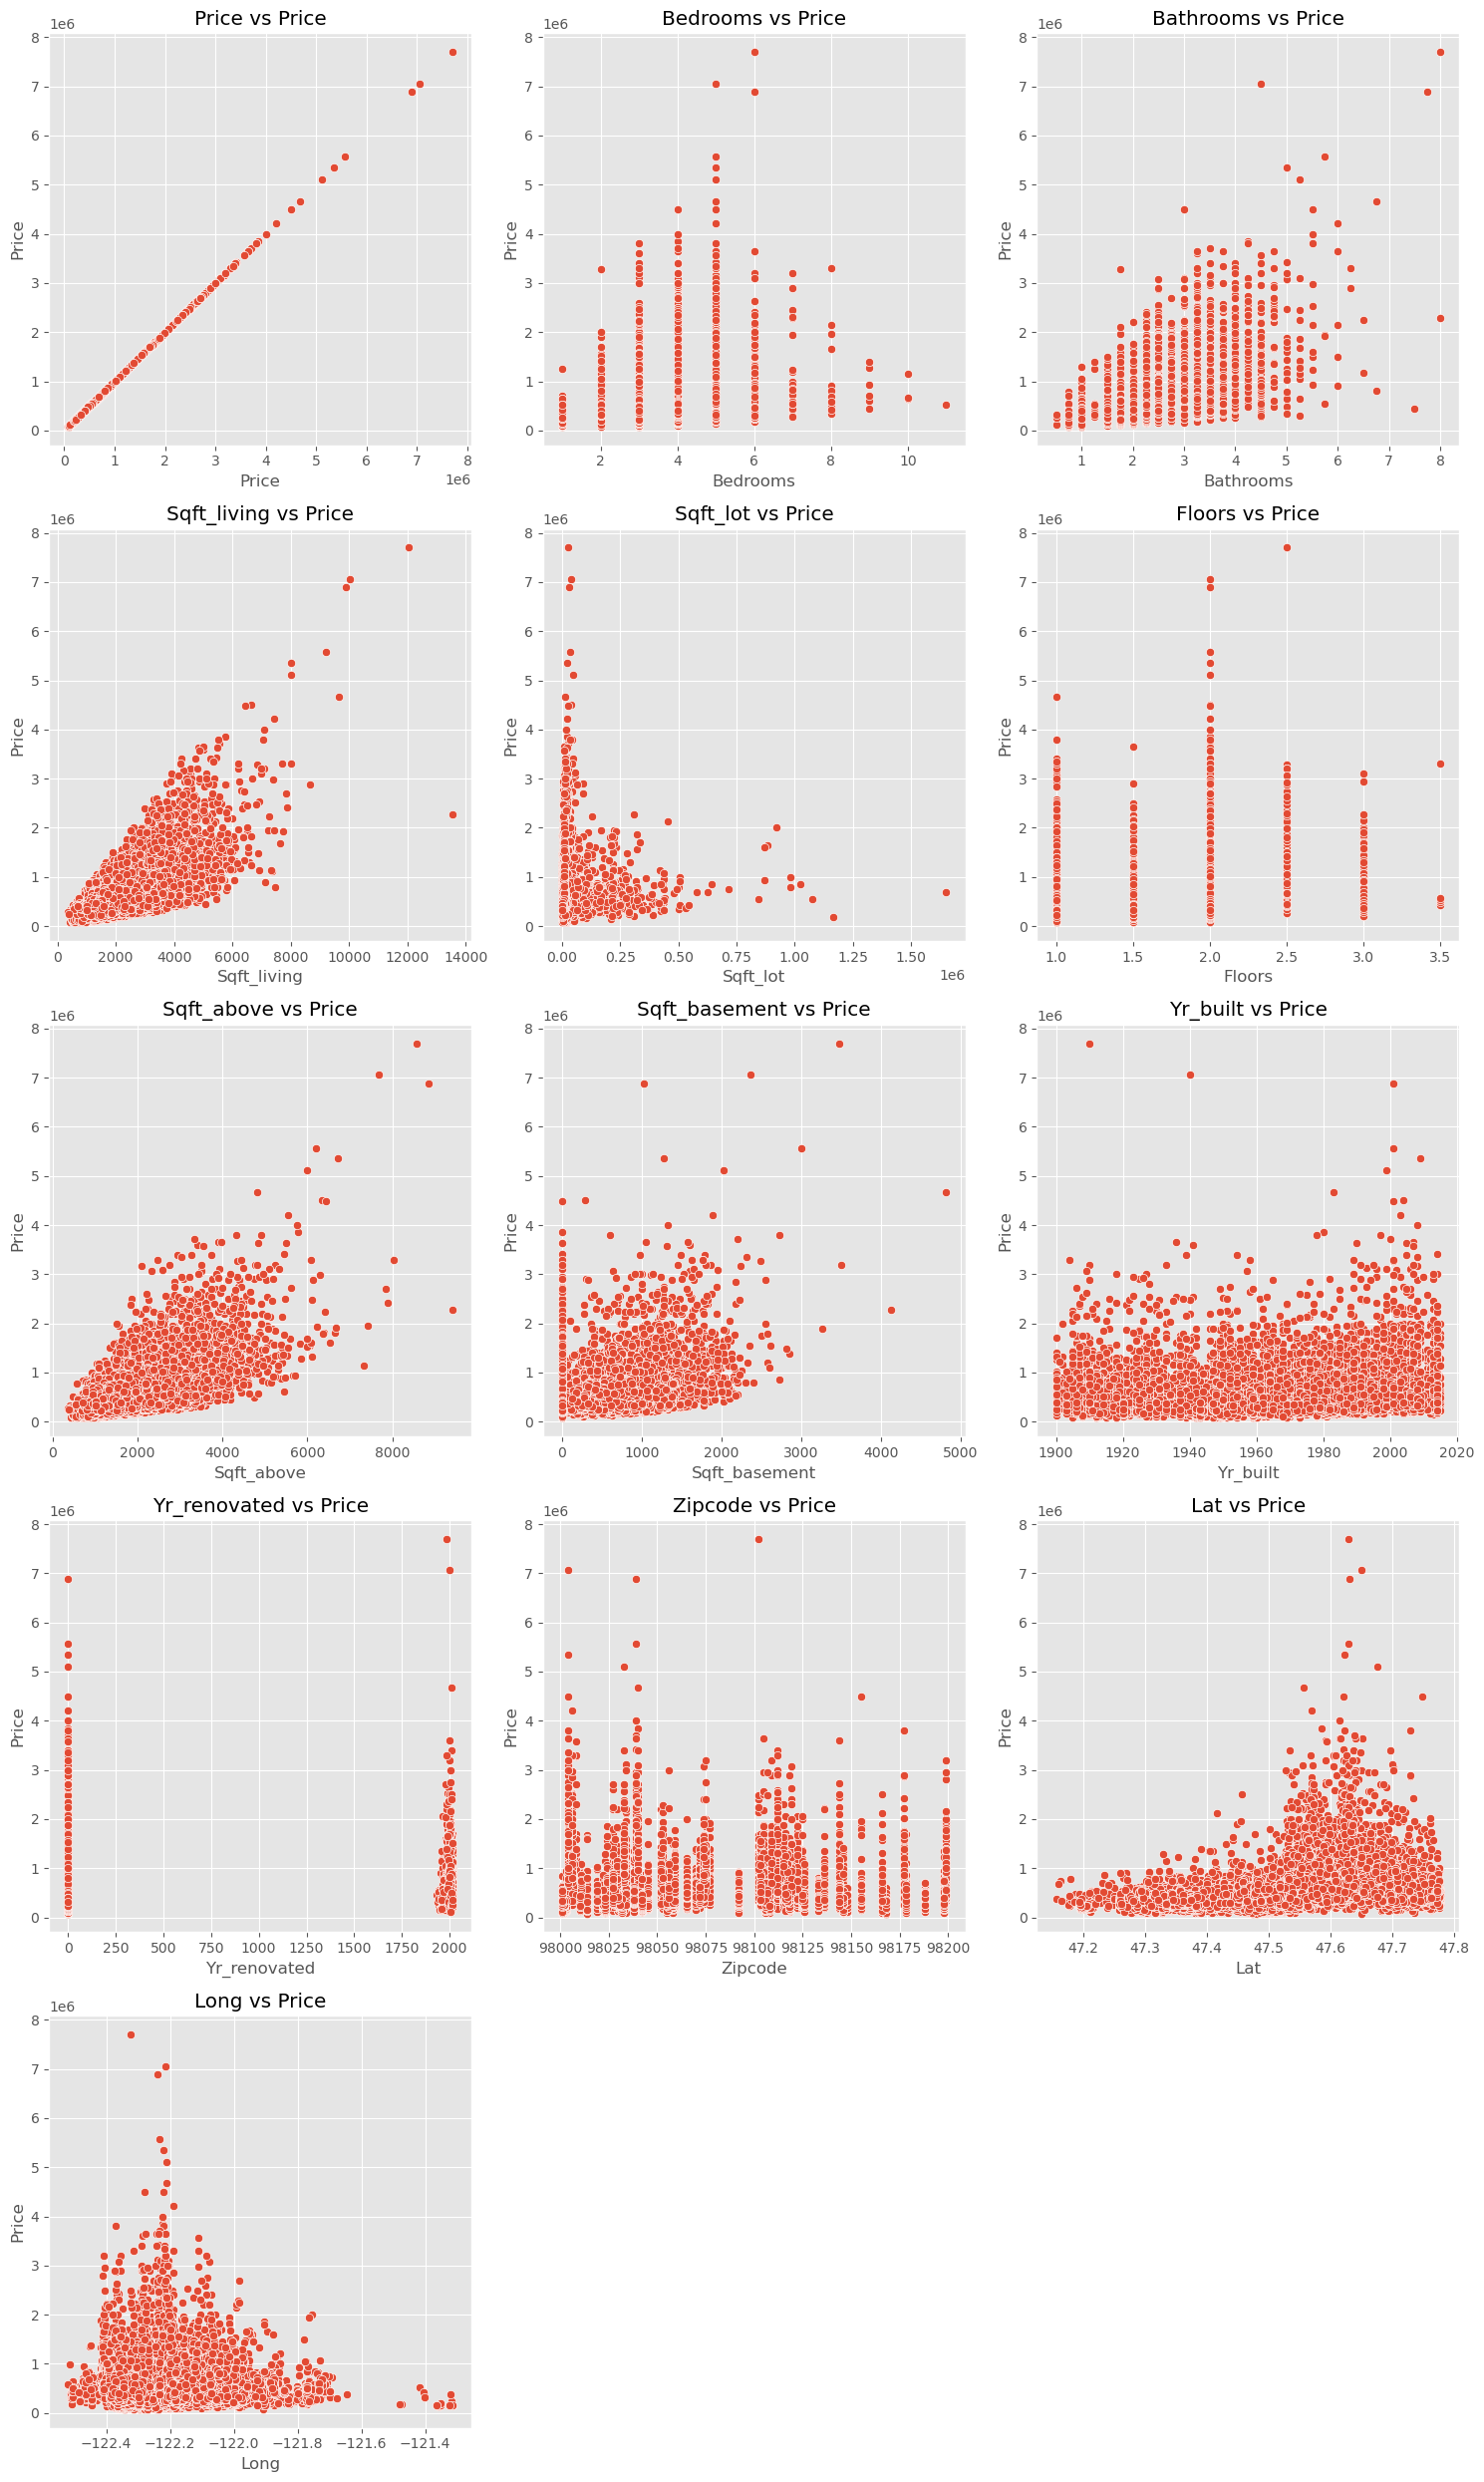

In [250]:

def plot_numerical_vs_price(df, numerical_columns):
    """
    Plot numerical columns against the price column in a DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        numerical_columns (list): A list of numerical column names.

    Returns:
        None
    """
    num_cols = len(numerical_columns)
    rows = (num_cols + 2) // 3  # Adjust for odd number of columns
    plt.figure(figsize=(15, 5 * rows))
    for i, column in enumerate(numerical_columns):
        plt.subplot(rows, 3, i+1)
        sns.scatterplot(x=df[column], y=df['price'])
        plt.title(f'{column.capitalize()} vs Price')
        plt.xlabel(column.capitalize())
        plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

plot_numerical_vs_price(king_county_df, numerical_columns)



**Bedrooms vs Price**:

There’s an increase in price with the number of bedrooms, but it’s not linear.
Homes with around 5-6 bedrooms have higher variability in price

**Bathrooms vs Price**:

Similar to bedrooms, more bathrooms generally correlate with a higher price.
However, there’s significant spread in the data, indicating other factors at play.

**Sqft_living vs Price**:

A clear positive correlation; larger living spaces are associated with higher prices.

**Sqft_lot vs Price**:

The correlation is less clear. Lot size (sqft_lot) might not be as influential on price

**Floors vs Price**:

Houses with more floors tend to have a higher price, but the relationship isn’t strong or linear.

**Sqft_above vs Price**:

Similar to sqft_living, more above-ground space correlates with higher prices.
Include sqft_above in your model

**Sqft_basement vs Price**:

There’s some positive correlation, but it’s weaker than sqft_living or sqft_above.
Consider it as a secondary feature.

**Yr_built vs Price**:

Newer houses tend to cost more, but there’s considerable variation in prices of older homes.
Year built is relevant but not the sole determinant

**Yr_renovated vs Price**:

Recently renovated houses can command higher prices.
Many old houses haven’t been renovated yet still have high values due to other factors like location or size.

**Zipcode vs Price**:

Certain zip codes (areas) have considerably higher median house prices.
Location plays a crucial role in determining house price.


**Relationship with categorical features**

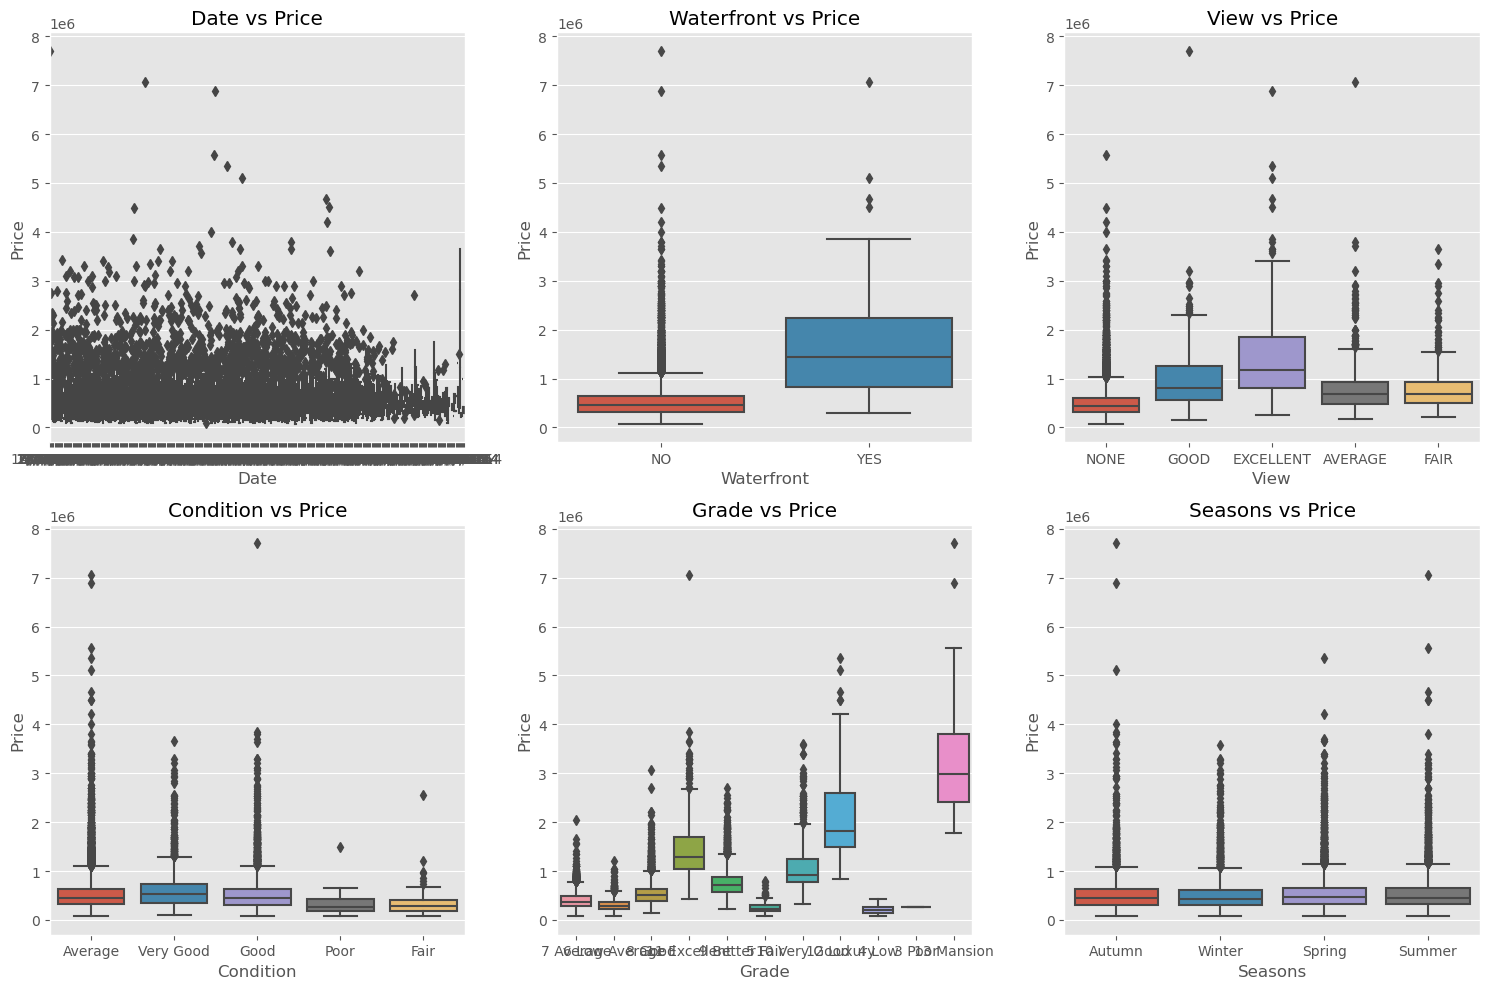

In [251]:

def plot_categorical_vs_price(df, categorical_columns):
    """
    Plot categorical columns against the price column in a DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        categorical_columns (list): A list of categorical column names.

    Returns:
        None
    """
    num_cols = len(categorical_columns)
    rows = (num_cols + 2) // 3  # Adjust for odd number of columns
    plt.figure(figsize=(15, 5 * rows))
    for i, column in enumerate(categorical_columns):
        plt.subplot(rows, 3, i+1)
        sns.boxplot(x=df[column], y=df['price'])
        plt.title(f'{column.capitalize()} vs Price')
        plt.xlabel(column.capitalize())
        plt.ylabel('Price')
    plt.tight_layout()
    plt.show()


plot_categorical_vs_price(king_county_df, categorical_columns)



**Waterfront vs Price**:

Homes with waterfronts tend to be significantly more expensive than those without.
Having a waterfront view can be a key determinant in pricing.

**View vs Price**:

The quality of the view impacts the price. Homes with excellent views command higher prices.
Enhancing views could potentially increase a property’s value.

**Condition vs Price**:

The condition of the home moderately influences the price. 
Very good and excellent conditions yield slightly higher prices, but not as significantly as other features like waterfront or view.

**Grade vs Price**:

There’s a strong correlation between grade and price. 
Higher-graded homes (especially those rated as Mansion or Luxury) fetch higher prices.

**Seasons vs price**:

The peak season for home sales typically occurs during the spring and summer months




**Assessing the geographic distribution of our house sales.**

In [252]:

def plot_zipcode_locations(df, lat_column='lat', long_column='long', zipcode_column='zipcode'):
    """
    Plot the locations of zip codes on a map using Folium.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        lat_column (str): The name of the column containing latitude values. Default is 'lat'.
        long_column (str): The name of the column containing longitude values. Default is 'long'.
        zipcode_column (str): The name of the column containing zipcode values. Default is 'zipcode'.

    Returns:
        None
    """
    # Group the data by zipcode and calculate the mean latitude and longitude
    zipcode_data = df.groupby(zipcode_column).agg({lat_column: 'mean', long_column: 'mean'}).reset_index()

    # Create a map centered at the mean latitude and longitude of all the zipcodes
    m = folium.Map(location=[df[lat_column].mean(), df[long_column].mean()], zoom_start=10)

    # Add markers for each zipcode
    for _, row in zipcode_data.iterrows():
        folium.Marker(location=[row[lat_column], row[long_column]], popup=row[zipcode_column]).add_to(m)

    # Display the map
    return m

plot_zipcode_locations(king_county_df)


**Bivariate EDA**

Exploring the interplay among variables.

Our bivariate EDA encompasses scrutinizing the connections between various features and the price.

**Identifying the peak and off-peak seasons for house sales.**

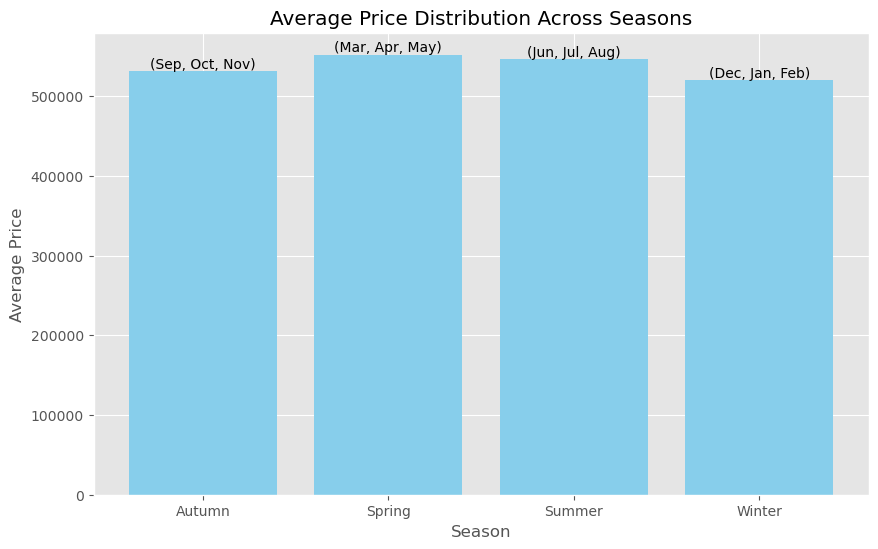

In [253]:


def plot_seasonal_avg_price(king_county_df):
    # Define a dictionary mapping each season to its corresponding months
    season_to_months = {
        "Spring": ["Mar", "Apr", "May"],
        "Summer": ["Jun", "Jul", "Aug"],
        "Autumn": ["Sep", "Oct", "Nov"],
        "Winter": ["Dec", "Jan", "Feb"]
    }

    # Group by season and calculate the mean price
    seasonal_avg_price = king_county_df.groupby('seasons')['price'].mean()

    # Create a bar plot for the average price per season
    plt.figure(figsize=(10, 6))
    plt.bar(seasonal_avg_price.index, seasonal_avg_price.values, color='skyblue')
    plt.xlabel('Season')
    plt.ylabel('Average Price')
    plt.title('Average Price Distribution Across Seasons')

    # Add text annotations for the months corresponding to each season
    for season, months in season_to_months.items():
        month_text = ', '.join(months)
        plt.text(season, seasonal_avg_price[season], f"({month_text})", ha='center', va='bottom')

    plt.show()

plot_seasonal_avg_price(king_county_df)


**Peak Home Sales Season**

The peak season for home sales typically occurs during the spring and summer months.
Specifically, the busiest home selling months are March,April, May, June, July, and August.
Buyers are actively searching for properties, and there’s typically increased demand.

The slowest months for home selling activity are November, December, January, and February.
Demand tends to be lower during these months.

factors Influencing Seasonality:

**Weather** Warmer weather encourages more people to explore the housing market.

**School Year**: Families often want to move before the start of the school year, which aligns with the spring and summer months.


**SQUARE FOOTAGE**

Now let's see what role the size of the home plays by looking at the square footage. I'm going to plot the distribution of the square footage features.

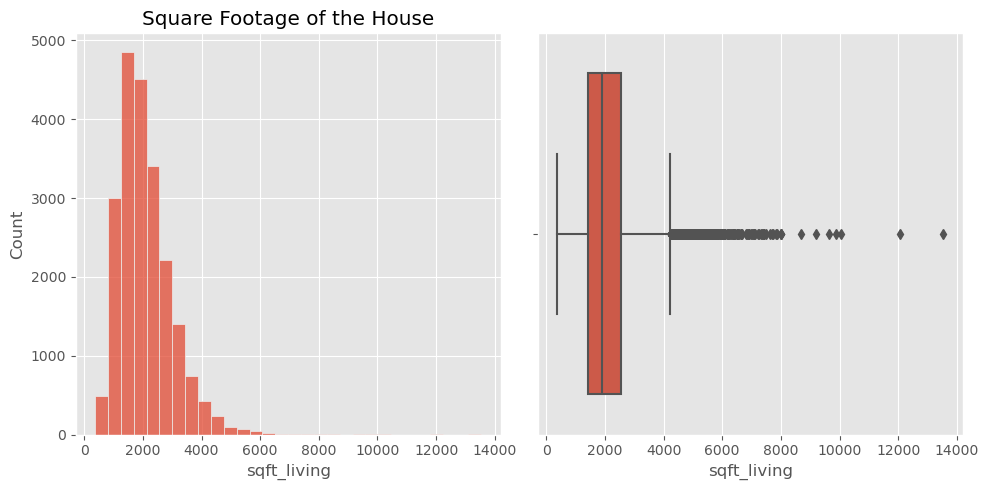

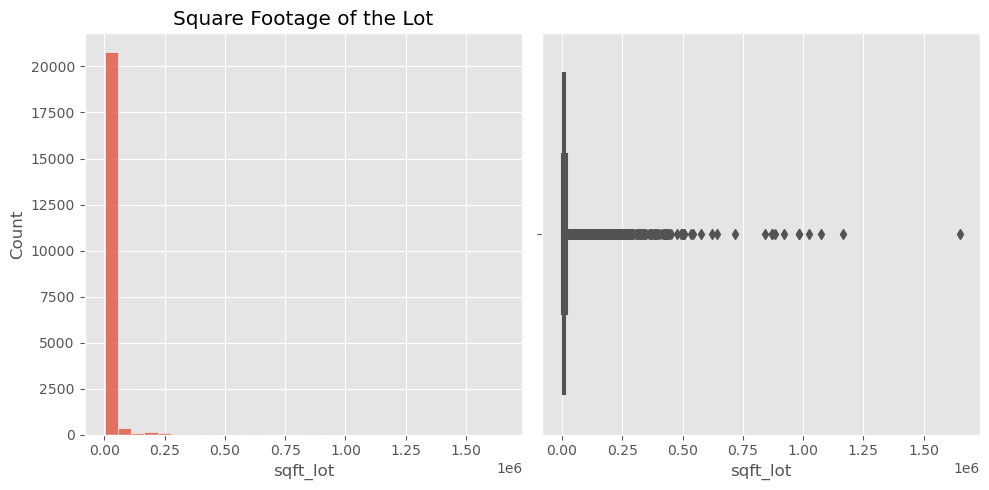

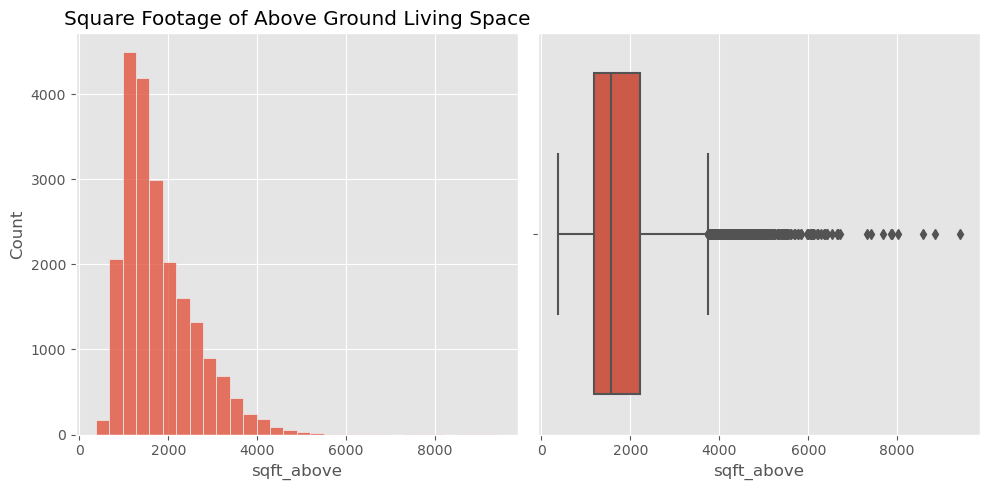

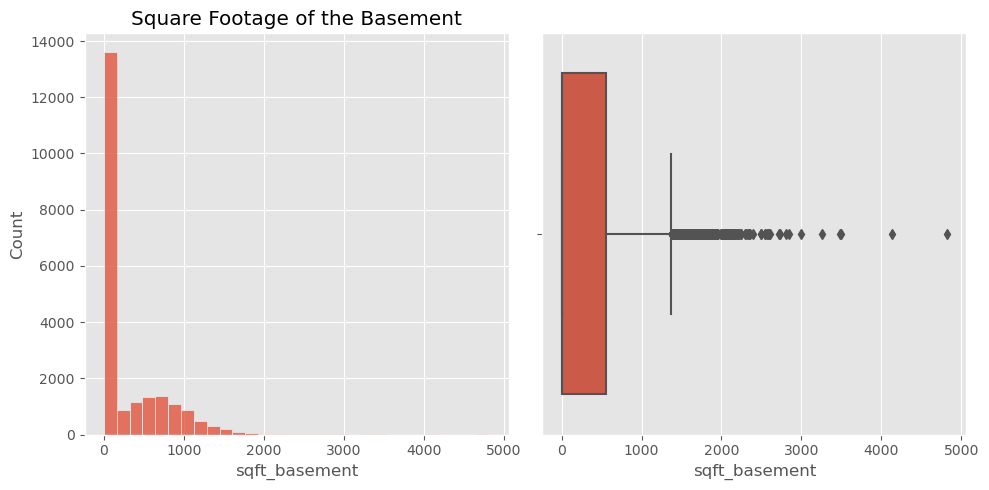

In [254]:


# Assuming king_county_df is your DataFrame and it has been properly cleaned and preprocessed
features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
titles = ['Square Footage of the House', 'Square Footage of the Lot',
          'Square Footage of Above Ground Living Space', 
          'Square Footage of the Basement']

for i, feature in enumerate(features):
    plt.figure(figsize=(10, 5))
    
    # Plotting histogram
    plt.subplot(1, 2, 1)
    sns.histplot(king_county_df[feature], kde=False, bins=30)
    plt.title(titles[i])
    
    # Plotting boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=king_county_df[feature])
    
    plt.tight_layout()
    plt.show()


**Square footage of the house**

Most houses have a square footage between 0 and 4000 sqft, as indicated by the peak in the histogram.
The rapid decline in counts as square footage increases suggests that larger houses are less common.
Understanding this distribution is crucial for modeling because it helps us identify the typical size of houses in the dataset.

**Square footage of the lot**

There are several outliers on the higher end of the square footage (sqft_lot) scale. These represent houses with exceptionally large lots.
Handling these outliers is crucial for building an accurate predictive model.
may choose to remove them if they are extreme or erroneous.Or consider transforming the sqft_lot feature (e.g., log transformation) to mitigate the impact of outliers.

**Square footage of Above Ground living space**

Most houses have between 0 to 4000 sqft of above-ground living space.
There’s a rapid decline in the number of houses as we move towards higher square footage values
Outliers (represented by dots beyond the whiskers) are houses with unusually large square footage

**Square footage of the Basement**

Most houses have smaller basements, as indicated by the high count near the 0 sqft mark.
This could imply that smaller basements are more common or that many houses don’t have basements at all.



**Correlations**:


There is a **positive correlation** between the number of bedrooms, bathrooms, and the overall living space (sqft_living) with the price of houses. This makes sense since larger houses with more bedrooms and bathrooms tend to be more expensive.

The sqft_lot feature does not show a strong correlation with the price. This suggests that the size of the lot (land area) may not be as significant a predictor of house prices.

The distribution of house prices appears to be right-skewed, meaning there are few very high-priced houses in the dataset. To improve model performance, you might consider applying transformations or scaling to normalize this feature.

**Multivariate EDA**

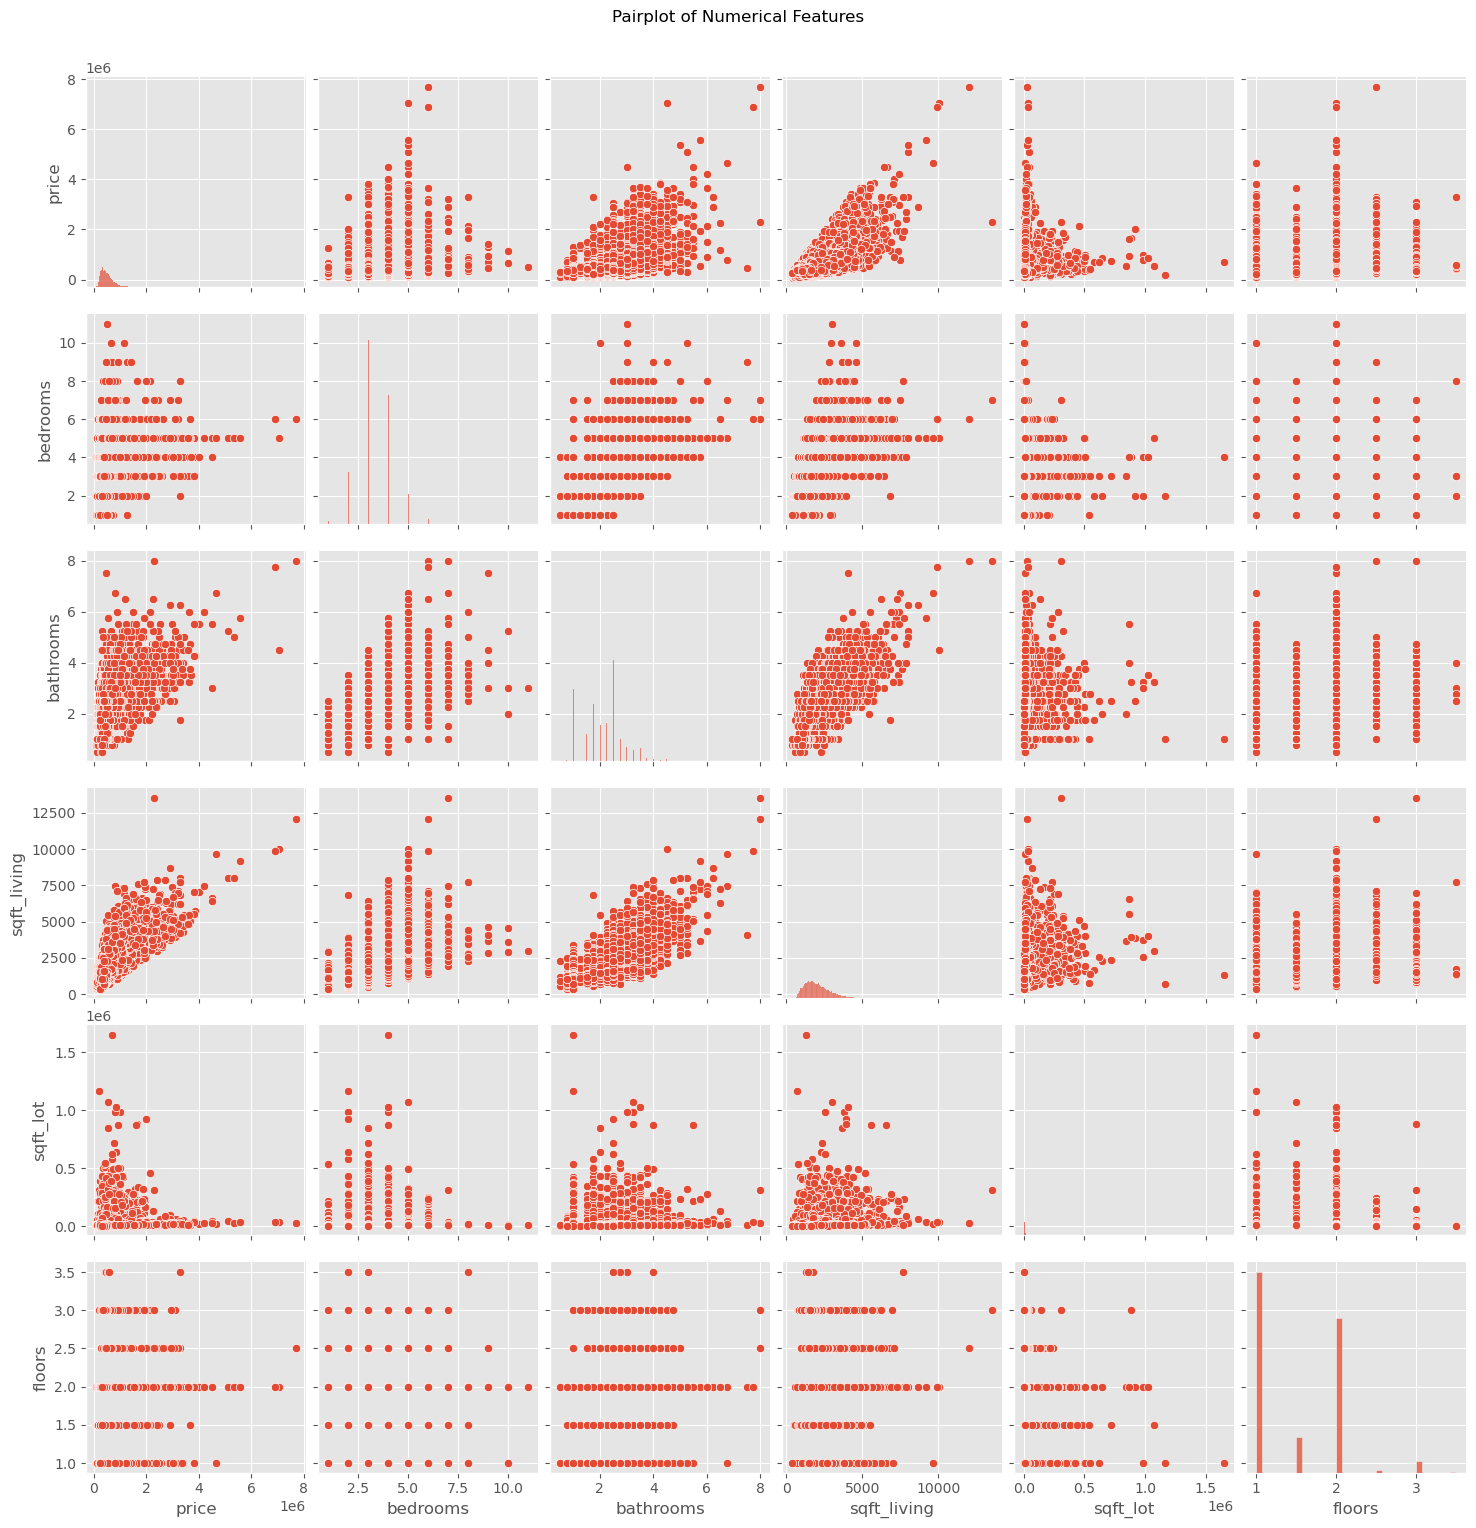

In [255]:
# Pairplot for visualizing relationships between numerical features
sns.pairplot(king_county_df, vars=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

**Correlations**:


There is a **positive correlation** between the number of bedrooms, bathrooms, and the overall living space (sqft_living) with the price of houses. This makes sense since larger houses with more bedrooms and bathrooms tend to be more expensive.

The sqft_lot feature does not show a strong correlation with the price. This suggests that the size of the lot (land area) may not be as significant a predictor of house prices.

The distribution of house prices appears to be right-skewed, meaning there are few very high-priced houses in the dataset. To improve model performance, you might consider applying transformations or scaling to normalize this feature.

In [256]:


def plot_correlation_matrix(df):
    """
    Plot the correlation matrix of the selected numerical variables in the DataFrame.
    
    Parameters:
    - df: DataFrame containing numerical variables.
    """
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr()
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Correlation Matrix of Selected Numerical Variables', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Extract the colorbar from the heatmap
    cbar = heatmap.collections[0].colorbar
    cbar.set_label('Correlation', fontsize=12)  # Set label for the colorbar

    plt.show()


plot_correlation_matrix(king_county_df)


ValueError: could not convert string to float: '10/13/2014'

<Figure size 1000x800 with 0 Axes>

**Variables Related to Price**

sqft_living (0.70) and bathrooms (0.53) have a strong positive correlation with price. This means that as the living area (square footage) and the number of bathrooms increase, the house price tends to increase.

bedrooms (0.32), floors (0.26), and sqft_above (0.61) also positively correlate with price, although not as strongly.

There is a weak negative correlation between zipcode (-0.05) and price. This suggests that the specific location (zipcode) may not significantly impact the house price.

**Strongly Related Variables**

sqft_living has a strong positive correlation with both bathrooms (0.76) and sqft_above (0.88). This indicates that these variables are related and might contain similar information for predicting house prices.

Additionally, there’s a notable positive correlation between ‘bedrooms’ and ‘bathrooms’ (0.53).


**Negative Correlation**

The year built (yr_built) has a negative relationship with the zipcode (-0.35). This means that older houses tend to be located in certain zipcodes.

**Twin Variables**

Given their high correlations, ‘sqft_living’ can be considered twins with ‘bathrooms’ and ‘sqft_above’. This implies that these variables share similar predictive power for house prices.

**MULTICOLLINEARITY**

How does each independent variable relate with the other

The mentioned pairs demonstrate the highest correlation with each other.

Hence, incorporating all of these variables would introduce multicollinearity into the model, prompting us to eliminate some of them

In [ ]:
def high_correlation_pairs(df, threshold=0.75):
    """
    Find pairs of variables with high correlation in the DataFrame.

    Parameters:
    - df: DataFrame containing numerical variables.
    - threshold: Threshold value for correlation. Default is 0.75.

    Returns:
    - DataFrame containing pairs of variables with correlation above the threshold.
    """
    # Calculate absolute correlations
    df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

    # Zip the variable name columns in a new column named "pairs"
    df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

    # Set index to pairs
    df_corr.set_index(['pairs'], inplace=True)

    # Drop level columns
    df_corr.drop(columns=['level_1', 'level_0'], inplace=True)

    # Rename correlation column
    df_corr.columns = ['cc']

    # Drop duplicates
    df_corr.drop_duplicates(inplace=True)

    # Filter pairs with correlation above the threshold
    high_corr_pairs = df_corr[(df_corr.cc > threshold) & (df_corr.cc < 1)]

    return high_corr_pairs

high_correlation_pairs(king_county_df)


,cc
pairs,
"(yr_built, house_age)",1.000000
"(yr_renovated, renovated)",0.999968
"(sqft_above, sqft_living)",0.876553
"(bathrooms, sqft_living)",0.755277


## Preparing data for modelling

* The above pairs are the most highly collerated to each other.
* Therefore adding all those variables will bring about multicollinearity in the model so we will drop some of them.

In [259]:
king_county_df.drop(['date','yr_built','sqft_above','seasons','yr_renovated'], axis=1, inplace=True)
king_county_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,house_age,renovated
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,0.0,98178,47.5112,-122.257,60,0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,400.0,98125,47.7210,-122.319,64,1
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,0.0,98028,47.7379,-122.233,82,0
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,910.0,98136,47.5208,-122.393,50,0
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,0.0,98074,47.6168,-122.045,28,0


#### One hot encoding

In [260]:
#one hot encoding waterfront,view and condition
king_county_transform = pd.get_dummies(king_county_df, columns=["waterfront",'view','condition'], dtype=int)
king_county_transform = king_county_transform.drop(["condition_Poor",'view_NONE','waterfront_NO'], axis=1)
king_county_transform

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,zipcode,lat,...,renovated,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,condition_Average,condition_Fair,condition_Good,condition_Very Good
0,221900.0,3,1.00,1180,5650,1.0,7 Average,0.0,98178,47.5112,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,7 Average,400.0,98125,47.7210,...,1,0,0,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,6 Low Average,0.0,98028,47.7379,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,7 Average,910.0,98136,47.5208,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,8 Good,0.0,98074,47.6168,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,8 Good,0.0,98103,47.6993,...,0,0,0,0,0,0,1,0,0,0
21593,400000.0,4,2.50,2310,5813,2.0,8 Good,0.0,98146,47.5107,...,0,0,0,0,0,0,1,0,0,0
21594,402101.0,2,0.75,1020,1350,2.0,7 Average,0.0,98144,47.5944,...,0,0,0,0,0,0,1,0,0,0
21595,400000.0,3,2.50,1600,2388,2.0,8 Good,0.0,98027,47.5345,...,0,0,0,0,0,0,1,0,0,0


The reference categories for view will be None, for waterfront will be No and for condition will be poor condition

#### Label Encoding

In [261]:
#Convert grade column to numeric using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
king_county_transform['grade'] = label_encoder.fit_transform(king_county_transform['grade'])
king_county_transform['grade'].value_counts()

grade
8     8948
9     6053
10    2604
7     2031
0     1130
1      397
6      242
2       88
5       27
3       13
4        1
Name: count, dtype: int64

In [262]:
king_county_transform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21534 non-null  float64
 1   bedrooms             21534 non-null  int64  
 2   bathrooms            21534 non-null  float64
 3   sqft_living          21534 non-null  int64  
 4   sqft_lot             21534 non-null  int64  
 5   floors               21534 non-null  float64
 6   grade                21534 non-null  int64  
 7   sqft_basement        21534 non-null  float64
 8   zipcode              21534 non-null  int64  
 9   lat                  21534 non-null  float64
 10  long                 21534 non-null  float64
 11  house_age            21534 non-null  int64  
 12  renovated            21534 non-null  int64  
 13  waterfront_YES       21534 non-null  int64  
 14  view_AVERAGE         21534 non-null  int64  
 15  view_EXCELLENT       21534 non-null  int6

In [263]:
king_county_transform.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,zipcode,lat,...,renovated,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,condition_Average,condition_Fair,condition_Good,condition_Very Good
0,221900.0,3,1.00,1180,5650,1.0,8,0.0,98178,47.5112,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,8,400.0,98125,47.7210,...,1,0,0,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,7,0.0,98028,47.7379,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,8,910.0,98136,47.5208,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,9,0.0,98074,47.6168,...,0,0,0,0,0,0,1,0,0,0


In [264]:
king_county_transform.corr()['price'].sort_values(ascending=False)

price                  1.000000
sqft_living            0.701587
bathrooms              0.525053
sqft_basement          0.319082
bedrooms               0.315229
lat                    0.307868
view_EXCELLENT         0.304674
waterfront_YES         0.259220
floors                 0.257052
view_GOOD              0.183962
view_AVERAGE           0.148072
renovated              0.117668
view_FAIR              0.093147
sqft_lot               0.090338
condition_Very Good    0.057674
long                   0.022417
condition_Average      0.008061
condition_Good        -0.032003
condition_Fair        -0.051633
zipcode               -0.053620
house_age             -0.054273
grade                 -0.365826
Name: price, dtype: float64

* Sqft_living has the strongest positive correlation with price
* Sqft_basement, bedrooms and view_EXCELLENT has low positive correlation with price
* Grade, Age and condition have weak negative correlation

## Modelling

Before beginning the modelling step, it is important that we consider what our goals are and what metrics of evaluation we will use. 

As a starting point, we are looking to establish the following models, each meeting different criteria.

**Model A**

This model will be generalisable. We will aim where possible to ensure it can be used as a basis towards creating a model for another area, so avoid features specific to King County such as exact `zipcode`. Provided we achieve a decent $R^2$, we will try and avoid interactions and/or polynomial regression. We will also try and limit the number of features if possible.

**Model B**

This model will be the most accurate whilst avoiding unecessary complexity.

**Model C**

This model will be our most accurate and most likely complex. We will aim for the highest adjusted $R^2$ value and lowest Root Mean Squared Error (RMSE).


For all models, we only wish to have statistically significant features (p-value below 0.05).

### Simple linear regression-Model A

We will begin with a simple linear regression model, using the single feature of `sqft_living` which looked to be a good predictor based on satisfying the linearity assumption and being positively correlated with price.

In [265]:
# Define X_train and y_train. As single feature need to reshape X_train1 into column vector
X_train1 = np.array(king_county_transform['sqft_living']).reshape(-1,1)
y_train1 = king_county_transform['price']

In [266]:
import statsmodels.api as sm

# Create model in OLS
X_int = sm.add_constant(X_train1)
model = sm.OLS(y_train1, X_int).fit()
summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:56:36   Log-Likelihood:            -2.9912e+05
No. Observations:               21534   AIC:                         5.982e+05
Df Residuals:                   21532   BIC:                         5.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.215e+04   4404.521     -9.570      0.0

As one might expect, using a single feature did not provide a strong model. 

The $R^2$ metric indicates that only 49% of the variance can be explained by our model.

Let us evaluate it by computing the RMSE.

In [267]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train1, y_train1)

# Evaluate using rmse
scores = cross_val_score(
            linreg, 
            X_train1,
            y_train1,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([264588.73740414, 281006.60140913, 248466.74475835, 283185.23488167,
       245037.59908383, 248515.39972768, 248475.17382312, 258382.33354171,
       261821.3018611 , 267529.86457734])

260700.8991068073

12958.457701152043

We can interpret the RMSE as the mean error in USD, which is approximately USD 260,700. This means that, on average, the actual price will deviate by around USD 260,700 from our predicted price. Despite using just one feature, this level of error is reasonable. Additionally, the standard deviation of approximately USD 12,958 indicates that our model doesn't appear to be overfitting.

The coefficient of `sqft_living` is 279.93, suggesting that for every additional square foot of living area, the price increases by approximately USD 279.93. In other words, if house A has a living area 1 sqft larger than house B, all other features being equal, house A will cost around USD 279 more.

One advantage of simple linear regression is its visual interpretability. Let's create a visualization illustrating the data points alongside our regression line.


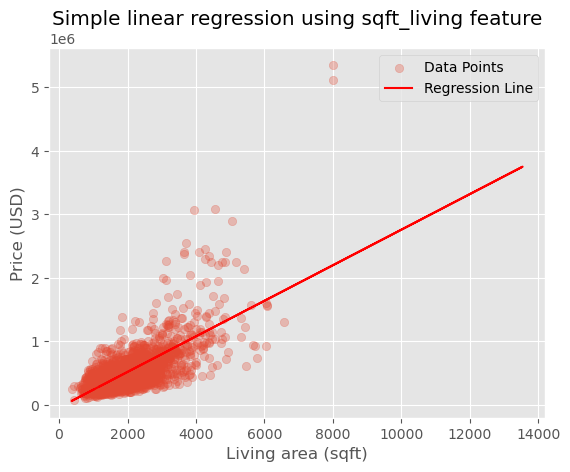

In [268]:
# Create visualisation of simple linear regression

# Get predictions
y_pred = linreg.predict(X_train1)
# Plot data points
plt.scatter(x = X_train1[:2000], y = y_train1[:2000], alpha = 0.3, label = 'Data Points')
# Plot regression line
plt.plot(X_train1, y_pred, color = 'red', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using sqft_living feature')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

We see that for smaller living areas our model looks decent but as the `sqft_living` value increases our model's performance declines, signifiying that `sqft_living` is not a good enough predictor for larger houses.

We will want to keep track of our models so let us build a table which will have the name of the model and key metrics.

In [269]:
# Define table as a dataframe with specific columns. Each column's values will be a list that we will add to.
evaluationtable = pd.DataFrame({'Model': [], 'Description':[], ' Num Features' : [], 'R-squared':[],
                                'Adj R-squared':[], 'RMSE': [],'RMSE sd':[]})

# Add data for simple linear regression
evaluationtable.loc[0] = ['Model-A', 'Sqft_living', model.df_model, round(model.rsquared,3)
                          ,round(model.rsquared_adj,3), int(rmse_scores.mean()), int(rmse_scores.std()) ]

# View our evaluation table
evaluationtable

,Model,Description,Num Features,R-squared,Adj R-squared,RMSE,RMSE sd
0,Model-A,Sqft_living,1.0,0.492,0.492,260700,12958


In [270]:
king_county_transform.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,zipcode,lat,...,renovated,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,condition_Average,condition_Fair,condition_Good,condition_Very Good
0,221900.0,3,1.00,1180,5650,1.0,8,0.0,98178,47.5112,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,8,400.0,98125,47.7210,...,1,0,0,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,7,0.0,98028,47.7379,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,8,910.0,98136,47.5208,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,9,0.0,98074,47.6168,...,0,0,0,0,0,0,1,0,0,0


### Multiple Linear Regression-Model 2

For our next model, we will add more features.

In [271]:
# Redefine X_train and y_train
X_train2 = king_county_transform.drop(['price'], axis = 1)
y_train2 = king_county_transform['price']

In [272]:
# Create model in OLS
X_int = sm.add_constant(X_train2)
model = sm.OLS(y_train2, X_int).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     2181.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:57:46   Log-Likelihood:            -2.9414e+05
No. Observations:               21534   AIC:                         5.883e+05
Df Residuals:                   21512   BIC:                         5.885e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.375e+06   2.93e+06      1.493      0.135   -1.37e+06    1.01e+07
bedrooms            -4.396e+04   2038.764    -21.561      0.000    -4.8e+04      -4e+04
bathrooms            5.362e+04   3358.374     15.967      0.000     4.7e+04    6.02e+04
sqft_living           254.7368      2.990     85.184      0.000     248.875     260.598
sqft_lot               -0.0739      0.036     -2.059      0.040      -0.144      -0.004
floors               2.783e+04   3679.109      7.566      0.000    2.06e+04     3.5e+04
grade               -1.933e+04    668.596    -28.912      0.000   -2.06e+04    -1.8e+04
sqft_basement         -53.6006      4.378    -12.244      0.000     -62.181     -45.020
zipcode              -725.9205     33.927    -21.396      0.000    -792.421    -659.420
lat                  6.981e+05   1.09e+04     64.214      0.000    6.77e+05    7.19e+05
long                -2.748e+05   1.32e+04    -20.745      0.000   -3.01e+05   -2.49e+05
house_age            1698.2455     73.381     23.143      0.000    1554.414    1842.077
renovated            6.389e+04   8197.005      7.794      0.000    4.78e+04       8e+04
waterfront_YES       4.816e+05   2.11e+04     22.837      0.000     4.4e+05    5.23e+05
view_AVERAGE         1.041e+05   7030.120     14.811      0.000    9.03e+04    1.18e+05
view_EXCELLENT       3.567e+05   1.46e+04     24.440      0.000    3.28e+05    3.85e+05
view_FAIR            1.381e+05   1.16e+04     11.878      0.000    1.15e+05    1.61e+05
view_GOOD            1.841e+05   9627.192     19.128      0.000    1.65e+05    2.03e+05
condition_Average     9.36e+04   3.86e+04      2.424      0.015    1.79e+04    1.69e+05
condition_Fair       7.304e+04   4.16e+04      1.754      0.079   -8560.665    1.55e+05
condition_Good       1.201e+05   3.86e+04      3.109      0.002    4.44e+04    1.96e+05
condition_Very Good  1.561e+05   3.88e+04      4.020      0.000       8e+04    2.32e+05
==============================================================================
Omnibus:                    15372.055   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           961468.045
Skew:                           2.814   Prob(JB):                         0.00
Kurtosis:                      35.247   Cond. No.                     2.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We note that all p-values are below our threshold of 0.05. Compare to single linear regression, our model's accuracy has improved considerably.The R-Squared is now 68%

Let us investigate if the residuals are normally distributed.

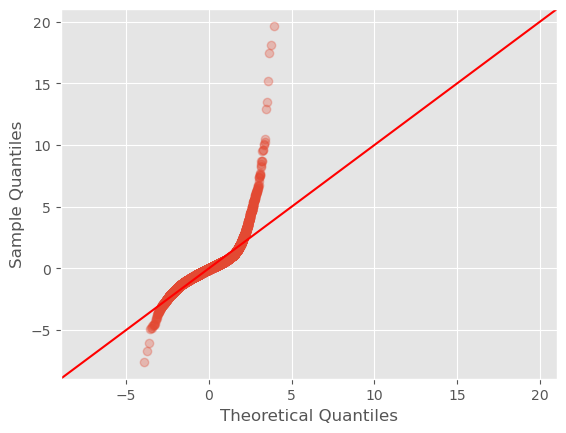

In [273]:
import scipy.stats as stats
# QQ-plot of residuals
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

There appears to be some issues with the residuals not being normally distributed.

Let us check homoscedasticity.

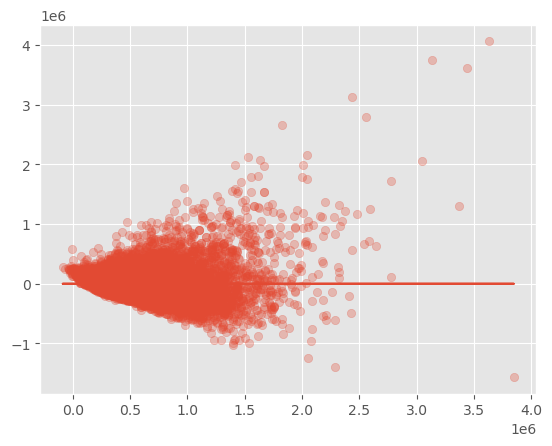

In [274]:
# Scatterplot of predictions
plt.scatter(model.predict(X_int), model.resid, alpha = 0.3)
plt.plot(model.predict(X_int), [0 for i in range(len(X_train2))])
plt.show()

Whilst not ideal, there is no strong evidence of heteroscedasticity. As such we might not need to consider a log transformation of the target variable.

Let us now evaluate the model using sci-kit learn's `cross_val_score`.

In [ ]:
# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train2, y_train2)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([206999.09166629, 224341.20348952, 200311.67825539, 229867.19785886,
       194953.81031787, 201724.22378861, 197541.66236095, 201007.32035271,
       208293.38047593, 214080.96132164])

207912.0529887774

11000.777360969923

The RMSE has reduced and the mean error is now around $207,000. Our standard deviation remains low.

Let us add this model to our evaluation table.

In [275]:
# Add metric to evaluation table
evaluationtable.loc[1] = ['Model-B', 'Limited one-hot encoding', model.df_model, round(model.rsquared,3)
                          ,round(model.rsquared_adj,3), int(rmse_scores.mean()), int(rmse_scores.std()) ]

# View our evaluation table, sorted by Adj R-squared
evaluationtable.sort_values(by = 'Adj R-squared', ascending=False)

,Model,Description,Num Features,R-squared,Adj R-squared,RMSE,RMSE sd
1,Model-B,Limited one-hot encoding,21.0,0.680,0.680,260700,12958
0,Model-A,Sqft_living,1.0,0.492,0.492,260700,12958


In [276]:
king_county_transform.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,zipcode,lat,...,renovated,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,condition_Average,condition_Fair,condition_Good,condition_Very Good
0,221900.0,3,1.00,1180,5650,1.0,8,0.0,98178,47.5112,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,8,400.0,98125,47.7210,...,1,0,0,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,7,0.0,98028,47.7379,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,8,910.0,98136,47.5208,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,9,0.0,98074,47.6168,...,0,0,0,0,0,0,1,0,0,0


In [277]:
king_county_transform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21534 non-null  float64
 1   bedrooms             21534 non-null  int64  
 2   bathrooms            21534 non-null  float64
 3   sqft_living          21534 non-null  int64  
 4   sqft_lot             21534 non-null  int64  
 5   floors               21534 non-null  float64
 6   grade                21534 non-null  int64  
 7   sqft_basement        21534 non-null  float64
 8   zipcode              21534 non-null  int64  
 9   lat                  21534 non-null  float64
 10  long                 21534 non-null  float64
 11  house_age            21534 non-null  int64  
 12  renovated            21534 non-null  int64  
 13  waterfront_YES       21534 non-null  int64  
 14  view_AVERAGE         21534 non-null  int64  
 15  view_EXCELLENT       21534 non-null  int6

### Further one-hot encoding

Let us conduct additional one-hot encoding of features which may be better treated as categorical and see how our model changes.

Let us conduct additional one-hot encoding of features which may be better treated as categorical and see how our model changes.

In [278]:
# Create a copy to manipulate
dfonehot = king_county_transform.copy()

In [281]:
# Select features for one-hot encoding
catcols = ['bedrooms', 'bathrooms', 'floors','grade']

In [282]:
# Define one-hot encoding function
def one_hot_encode(df, catcols):
    '''Returns df with dummy vars and drops original column'''
    
    # Create DataFrame with above columns
    dfonehot = df[catcols].astype('category')
    
    # Get dummy variables and drop first one to not create dependency
    dfonehot = pd.get_dummies(dfonehot, drop_first = True)
    
    # Recreate DataFrame with one-hot encoded variables
    df = pd.concat([df,dfonehot], axis=1)
    
    # Drop columns where we have done one-hot encoding
    df = df.drop(catcols, axis = 1)
        
    return df

# Apply one_hot encoding to dfmod
dfonehot = one_hot_encode(king_county_transform, catcols)
dfonehot= dfonehot.replace({True: 1, False: 0})

In [283]:
dfonehot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 71 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21534 non-null  float64
 1   sqft_living          21534 non-null  int64  
 2   sqft_lot             21534 non-null  int64  
 3   sqft_basement        21534 non-null  float64
 4   zipcode              21534 non-null  int64  
 5   lat                  21534 non-null  float64
 6   long                 21534 non-null  float64
 7   house_age            21534 non-null  int64  
 8   renovated            21534 non-null  int64  
 9   waterfront_YES       21534 non-null  int64  
 10  view_AVERAGE         21534 non-null  int64  
 11  view_EXCELLENT       21534 non-null  int64  
 12  view_FAIR            21534 non-null  int64  
 13  view_GOOD            21534 non-null  int64  
 14  condition_Average    21534 non-null  int64  
 15  condition_Fair       21534 non-null  int6

### Multiple linear regression-Model 3
This model uses th dfnehot dataframe that had been further encoded

In [284]:
# Create copy to work with
dfgeo = dfonehot.copy()

In [285]:
import reverse_geocoder as rg
#Define function to add neighbourhood
def neighbourhood_feat(df):
    '''Adds neighbourhood feature using reverse_geocoder'''
    
    # Define coord column with lat and long
    df['coord'] = list(zip(df['lat'], df['long']))
    
    # Use reverse geocoder
    results = rg.search(list(df['coord']))
    
    # Define neighbourhood list
    neighbourhoods = [results[i]['name'] for i in range(0, len(results))]
    
    # Add neighbourhood feature
    df['neighbourhood'] = neighbourhoods
    
    return df


# Add neighbourhood feature
dfgeo = neighbourhood_feat(dfgeo)

# One-hot encode neighbourhood
dfgeo = one_hot_encode(dfgeo, 'neighbourhood')

# Drop coord, lat, long, zipcode columns
dfgeo = dfgeo.drop(['coord', 'lat', 'long', 'zipcode'], axis = 1)
dfgeo = dfgeo.replace({True: 1, False: 0})
# Check 
dfgeo.head()

Loading formatted geocoded file...


,price,sqft_living,sqft_lot,sqft_basement,house_age,renovated,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,...,Tacoma,Tanner,Tukwila,Union Hill-Novelty Hill,Vashon,West Lake Sammamish,White Center,Woodinville,Woodway,Yarrow Point
0,221900.0,1180,5650,0.0,60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,2570,7242,400.0,64,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,770,10000,0.0,82,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,910.0,50,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,510000.0,1680,8080,0.0,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [286]:
# Define X_train and y_train
X_train3 = dfgeo.drop('price', axis = 1)
y_train3 = dfgeo['price']

In [287]:
# Create model in OLS
X_int = sm.add_constant(X_train3)
model = sm.OLS(y_train3, X_int).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     668.8
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:04:41   Log-Likelihood:            -2.8800e+05
No. Observations:               21534   AIC:                         5.763e+05
Df Residuals:                   21388   BIC:                         5.774e+05
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      5.293e+04   8.82e+04      0.600      0.549    -1.2e+05    2.26e+05
sqft_living                 157.0681      2.934     53.535      0.000     151.317     162.819
sqft_lot                      0.1465      0.029      5.006      0.000       0.089       0.204
sqft_basement               -38.9699      3.630    -10.735      0.000     -46.085     -31.855
house_age                   620.8017     66.761      9.299      0.000     489.946     751.657
renovated                  6.207e+04   6251.144      9.930      0.000    4.98e+04    7.43e+04
waterfront_YES             5.745e+05   1.63e+04     35.317      0.000    5.43e+05    6.06e+05
view_AVERAGE               7.149e+04   5408.981     13.218      0.000    6.09e+04    8.21e+04
view_EXCELLENT             2.826e+05   1.12e+04     25.229      0.000    2.61e+05    3.05e+05
view_FAIR                  9.805e+04   8877.015     11.046      0.000    8.07e+04    1.15e+05
view_GOOD                  1.437e+05   7411.471     19.388      0.000    1.29e+05    1.58e+05
condition_Average          8.298e+04   2.94e+04      2.827      0.005    2.54e+04    1.41e+05
condition_Fair             7.319e+04   3.15e+04      2.320      0.020    1.14e+04    1.35e+05
condition_Good             1.109e+05   2.94e+04      3.777      0.000    5.33e+04    1.68e+05
condition_Very Good        1.541e+05   2.95e+04      5.214      0.000    9.62e+04    2.12e+05
bedrooms_2                 8374.5316    1.2e+04      0.696      0.486   -1.52e+04     3.2e+04
bedrooms_3                 1.479e+04   1.21e+04      1.227      0.220   -8843.763    3.84e+04
bedrooms_4                 -538.6282   1.23e+04     -0.044      0.965   -2.47e+04    2.36e+04
bedrooms_5                  -1.2e+04    1.3e+04     -0.924      0.356   -3.75e+04    1.35e+04
bedrooms_6                -6.818e+04   1.58e+04     -4.306      0.000   -9.92e+04   -3.71e+04
bedrooms_7                -1.732e+05    2.9e+04     -5.976      0.000    -2.3e+05   -1.16e+05
bedrooms_8                 7469.8114    4.6e+04      0.162      0.871   -8.26e+04    9.76e+04
bedrooms_9                -1.029e+05   7.16e+04     -1.438      0.151   -2.43e+05    3.74e+04
bedrooms_10               -1.685e+05   9.24e+04     -1.823      0.068    -3.5e+05    1.26e+04
bedrooms_11               -1.485e+05   1.57e+05     -0.946      0.344   -4.56e+05    1.59e+05
bathrooms_0.75             2.543e+04   8.07e+04      0.315      0.753   -1.33e+05    1.84e+05
bathrooms_1.0              5.237e+04   7.84e+04      0.668      0.504   -1.01e+05    2.06e+05
bathrooms_1.25             1.822e+04   9.41e+04      0.194      0.846   -1.66e+05    2.03e+05
bathrooms_1.5              4.717e+04   7.85e+04      0.601      0.548   -1.07e+05    2.01e+05
bathrooms_1.75             4.503e+04   7.85e+04      0.574      0.566   -1.

We see that the adjusted $R^2$ has improved significantly and is now 0.819

Let us now evaluate the model using sci-kit learn's `cross_val_score`.

In [289]:
# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train3, y_train3)


scores = cross_val_score(
            linreg, 
            X_train3,
            y_train3,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([168227.93410642, 185436.09765968, 152301.04284876, 195399.68637643,
       150182.5594069 , 181114.96294388, 162385.12397365, 148722.57975775,
       160906.31162711, 170811.08199113])

167548.73806917196

15000.216513115703

In [292]:
# Add model to evaluation table
evaluationtable.loc[3] = ['Model-C', 'Further one-hot encoding', model.df_model, round(model.rsquared,3)
                          ,round(model.rsquared_adj,3), int(rmse_scores.mean()), int(rmse_scores.std()) ]

# View our evaluation table
evaluationtable.sort_values(by = 'Adj R-squared', ascending=False)

,Model,Description,Num Features,R-squared,Adj R-squared,RMSE,RMSE sd
3,Model-C,Further one-hot encoding,145.0,0.819,0.818,167548,15000
1,Model-B,Limited one-hot encoding,21.0,0.680,0.680,260700,12958
0,Model-A,Sqft_living,1.0,0.492,0.492,260700,12958
